<a href="https://colab.research.google.com/github/swidyarto/ACE-Digital/blob/main/SolutionQ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 2

### A team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. They have collected a set of data and needed help in analysing on how external factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of oil palm tree determines the FFB yield, and are linked to the external factors. 
- Perform the analysis, which requires some study on the background of oil palm tree physiology.
(refer attachment palm_ffb.csv)


## 1. Lets import all the libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import missingno as msno
import scipy.stats as st
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## 2. Read the dataset and explore the statistics

In [ ]:
data = pd.read_csv('palm_ffb.csv')

In [ ]:
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [ ]:
data.tail()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
125,01.06.2018,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29
126,01.07.2018,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42
127,01.08.2018,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61
128,01.09.2018,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91
129,01.10.2018,510.8,26.819355,21.0,34.4,207.0,26,771805.3922,2.04


In [ ]:
data.shape

(130, 9)

In [ ]:
data.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [ ]:
data.isnull().any()

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

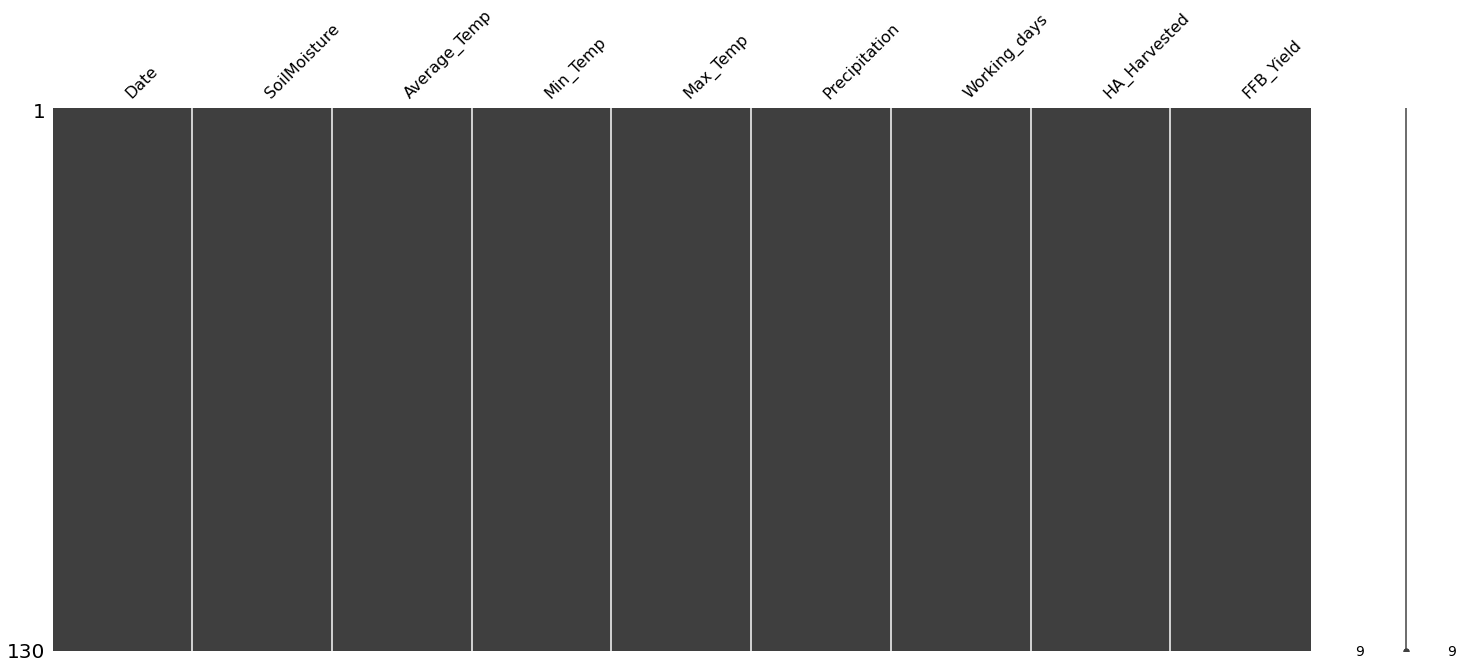

In [ ]:
msno.matrix(data)

In [ ]:
# msno.heatmap(data)

In [ ]:
# msno.dendrogram(data)

In [ ]:
d_skew = data.skew() 
d_kurt = data.kurt()

frame = { 'Skewness': d_skew, 'Kurtosis': d_kurt } 
  
df_skew_kurt = pd.DataFrame(frame)

In [ ]:
df_skew_kurt

,Skewness,Kurtosis
SoilMoisture,-0.394336,-0.262867
Average_Temp,-0.340606,0.141138
Min_Temp,-1.121358,2.000500
Max_Temp,-0.215635,-0.591251
Precipitation,0.526227,1.206761
Working_days,-0.660814,0.565301
HA_Harvested,-0.064445,0.085981
FFB_Yield,0.188629,-0.670960


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

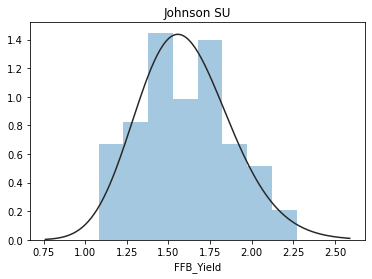

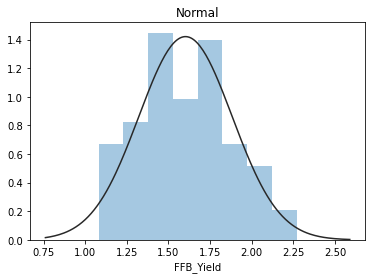

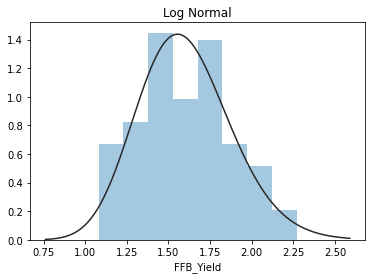

In [ ]:
y = data['FFB_Yield']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


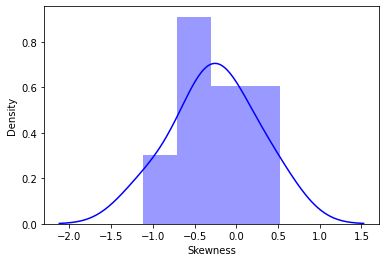

In [ ]:
sns.distplot(data.skew(),color='blue',axlabel ='Skewness')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


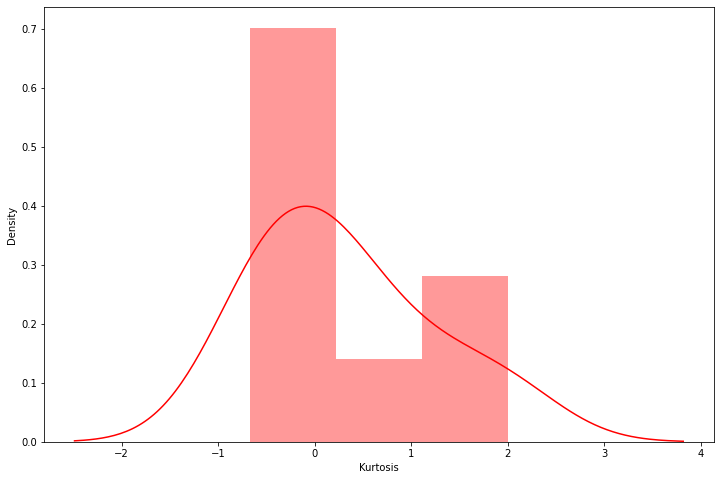

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(data.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

## Summary
- Data contains all numerical columns
- No missing Values
- No issues of Variance
- No issues of skewness and kurtosis

In [ ]:
# plt.hist(data['FFB_Yield'],orientation = 'vertical',histtype = 'bar', color ='blue')
# plt.show()

In [ ]:
# target = np.log(data['FFB_Yield'])
# target.skew()
# plt.hist(target,color='blue')

## 3. Lets explore the distributions further


Number of numerical variables:  8


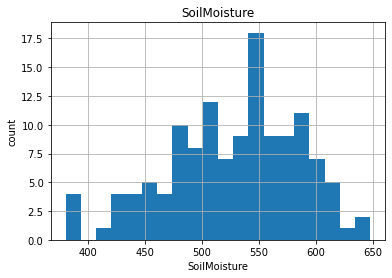

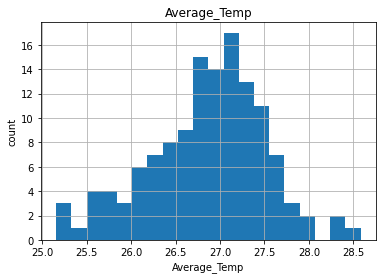

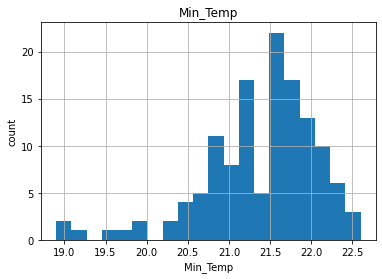

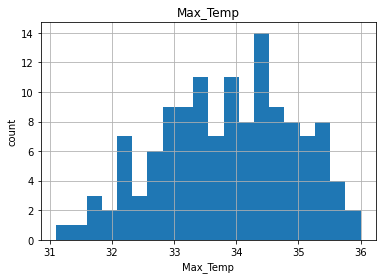

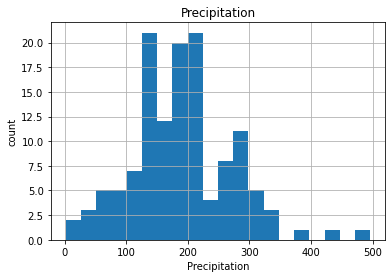

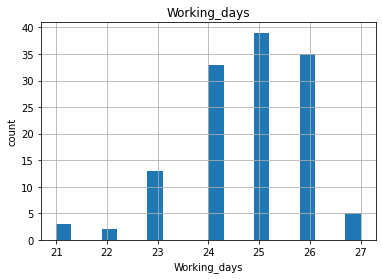

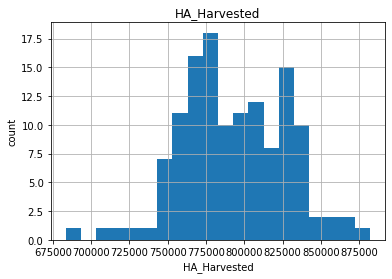

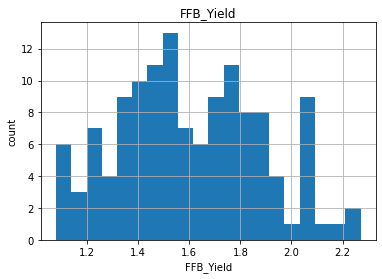

In [ ]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in num_vars:
    analyse_continous(data, var)

## Summary
- min_temp is slightly skewed to the left(negatively skewed)


## 4. Lets explore the only discrete variable we have called Working_days


In [ ]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<20]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  1


In [ ]:
# let's visualise the discrete variables
data[discrete_vars].head()

,Working_days
0,25
1,23
2,25
3,25
4,25


In [ ]:
data[discrete_vars].describe()

,Working_days
count,130.000000
mean,24.753846
std,1.239289
min,21.000000
25%,24.000000
50%,25.000000
75%,26.000000
max,27.000000


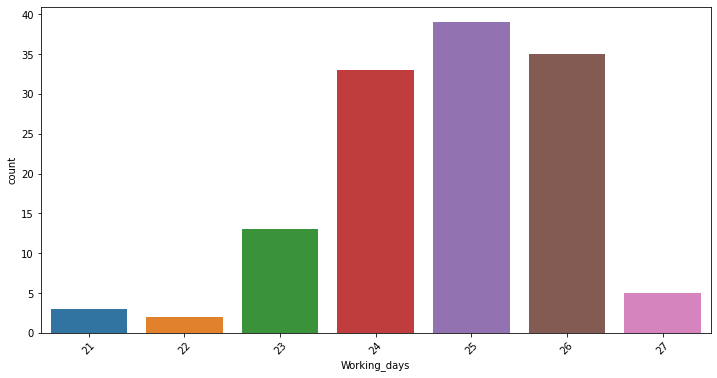

In [ ]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Working_days', data = data)
xt = plt.xticks(rotation=45)

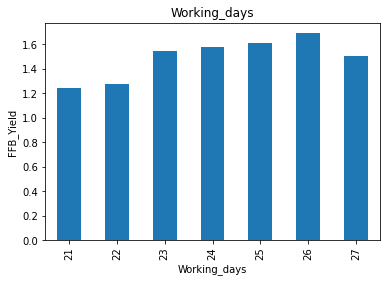

In [ ]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['FFB_Yield'].median().plot.bar()
    plt.title(var)
    plt.ylabel('FFB_Yield')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

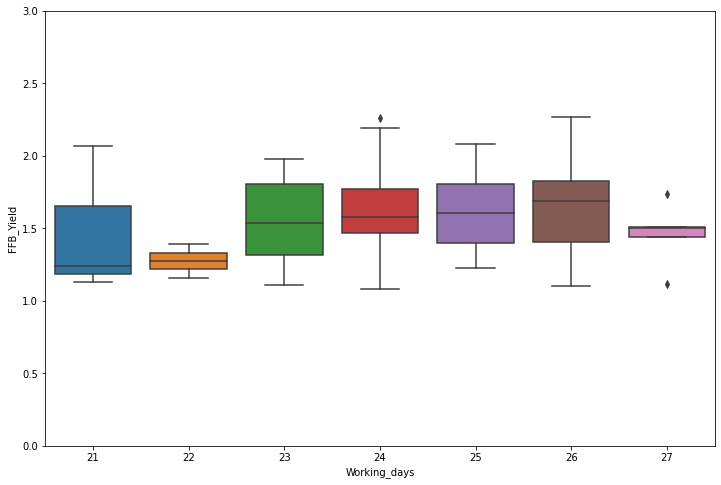

In [ ]:
var = 'Working_days'
data_working_days = pd.concat([data['FFB_Yield'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="FFB_Yield", data=data_working_days)
fig.axis(ymin=0, ymax=3);

### We see that there is a relationship between the variable numbers and the FFB_Yield, but this relationship is not always monotonic. 

### For example, for Workinf_days, it seems there is a monotonic relationship: the higher the workind days, the higher the FFB Yield. It is clear that with more working days, the median yield increases except for the higest days(27). Also the maximum yield is generated when working days are equal to 26.

In [ ]:
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [ ]:

# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  7


In [ ]:
# let's visualise the continuous variables
data[cont_vars].head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,HA_Harvested,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,777778.3951,1.62
1,568.9,26.165517,20.9,35.1,140.2,767988.2759,1.45
2,577.6,25.448387,21.3,32.9,280.4,783951.9231,1.56
3,581.1,26.903333,20.6,34.8,173.3,788987.0504,1.39
4,545.4,27.241935,20.9,35.0,140.6,813659.7222,1.44


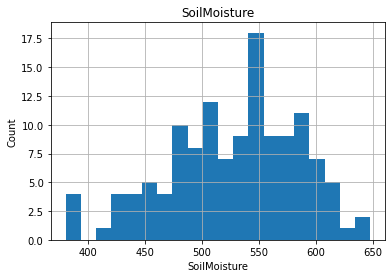

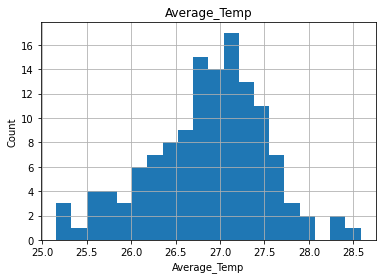

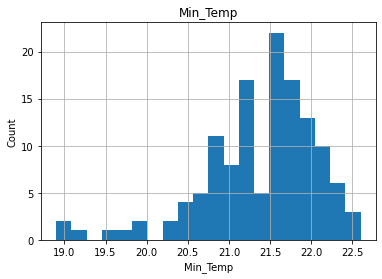

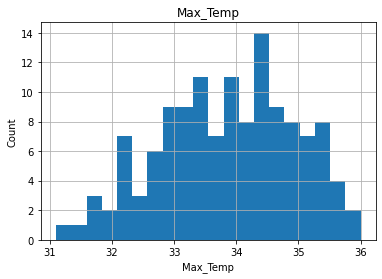

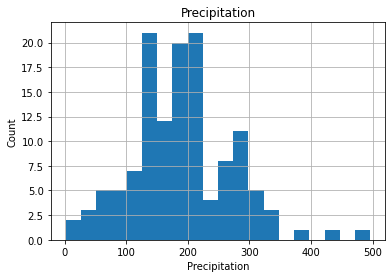

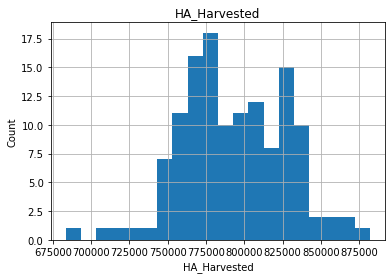

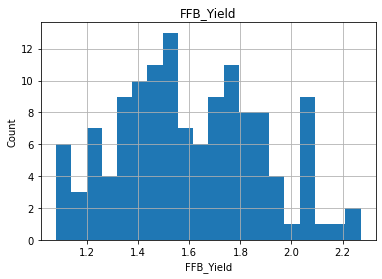

In [ ]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    df[var].hist(bins=20)
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in cont_vars:
    analyse_continous(data, var)

## 5. Try to make the distribution normal - Log time


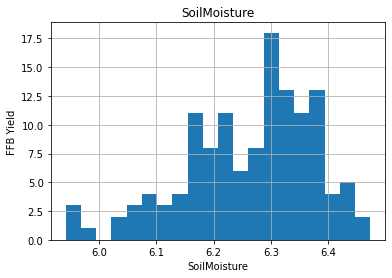

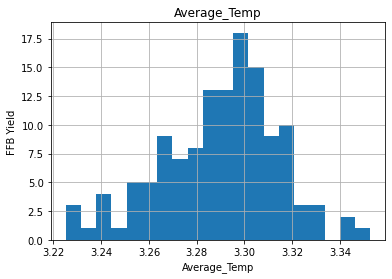

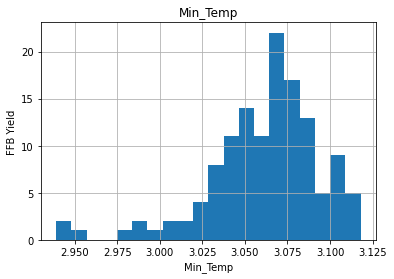

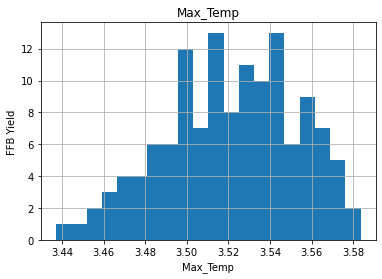

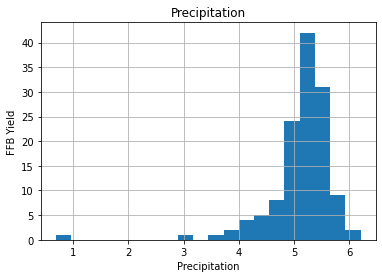

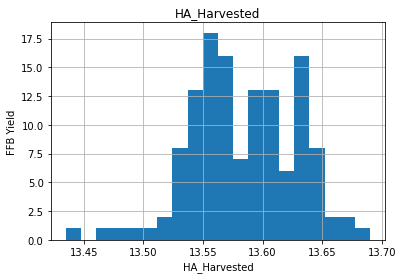

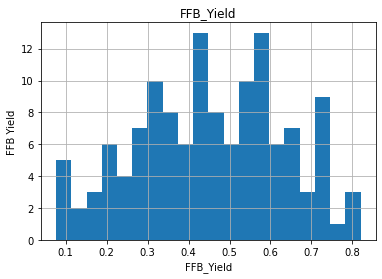

In [ ]:
# Let's go ahead and analyse the distributions of these variables
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if 0 in data[var].unique():
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel('FFB Yield')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
    
for var in cont_vars:
    analyse_transformed_continous(data, var)

## Summary
- Stick to the original data as taking log of skewd variables only makes the distribution worse.

In [ ]:
# # let's explore the relationship between the FFB Yield and the transformed variables
# # with more detail
# def transform_analyse_continous(df, var):
#     df = df.copy()
    
#     # log does not take negative values, so let's be careful and skip those variables
#     if 0 in data[var].unique():
#         pass
#     else:
#         # log transform
#         df[var] = np.log(df[var])
#         df['FFB_Yield'] = np.log(df['FFB_Yield'])
#         plt.scatter(df[var], df['FFB_Yield'])
#         plt.ylabel('FFB_Yield')
#         plt.xlabel(var)
#         plt.show()
    
# for var in cont_vars:
#     if var !='FFB_Yield':
#         transform_analyse_continous(data, var)

## 6. Explore relationships between the FFB Yield and other features - Scatter/Pair Plots.


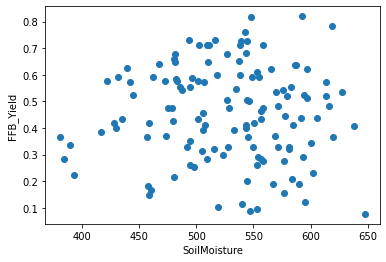

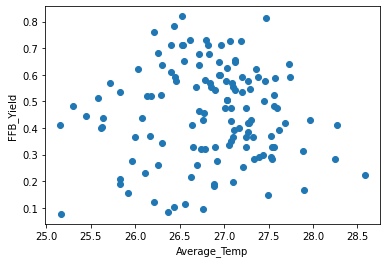

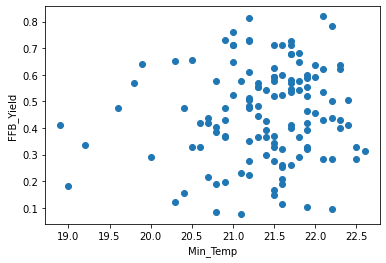

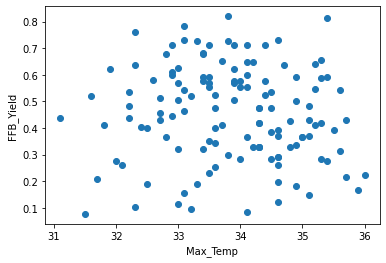

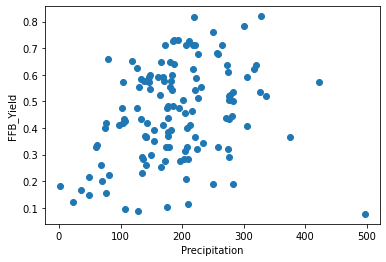

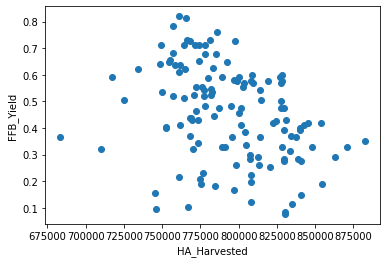

In [ ]:
# let's explore the relationship between the FFB Yield and the transformed variables
# with more detail
def non_transform_analyse_continous(df, var):
    df = df.copy()
    df['FFB_Yield'] = np.log(df['FFB_Yield'])
    plt.scatter(df[var], df['FFB_Yield'])
    plt.ylabel('FFB_Yield')
    plt.xlabel(var)
    plt.show()

for var in cont_vars:
    if var !='FFB_Yield':
        non_transform_analyse_continous(data, var)

## Summary
- Because one increases so does the other,  a linear relationship can be observed between FFB Yield and Precipitation feature.

## 7. Look for correlations among the features and also with the FFB_Yield, our target variable. 


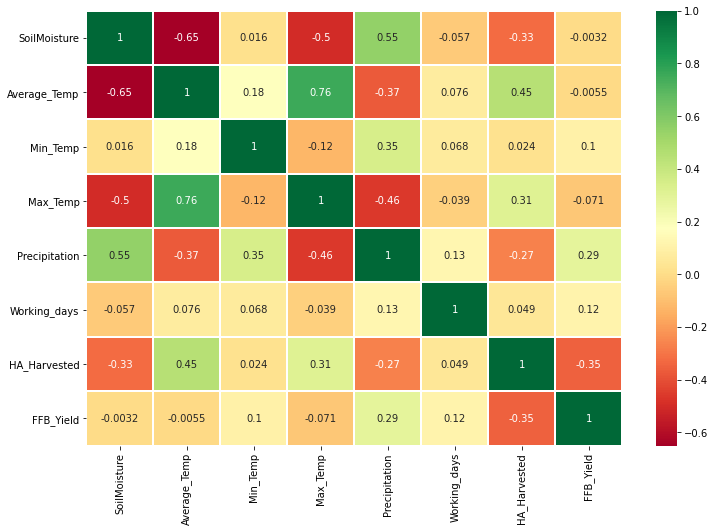

In [ ]:
#Using Pearson Correlation
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(data.corr()["FFB_Yield"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Min_Temp         0.103830
Precipitation    0.289604
Working_days     0.116364
HA_Harvested     0.350222
FFB_Yield        1.000000
Name: FFB_Yield, dtype: float64

In [ ]:
# correlation = data[num_vars].corr()
# print(abs(correlation['FFB_Yield'].sort_values(ascending = True)),'\n')

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='baseline', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

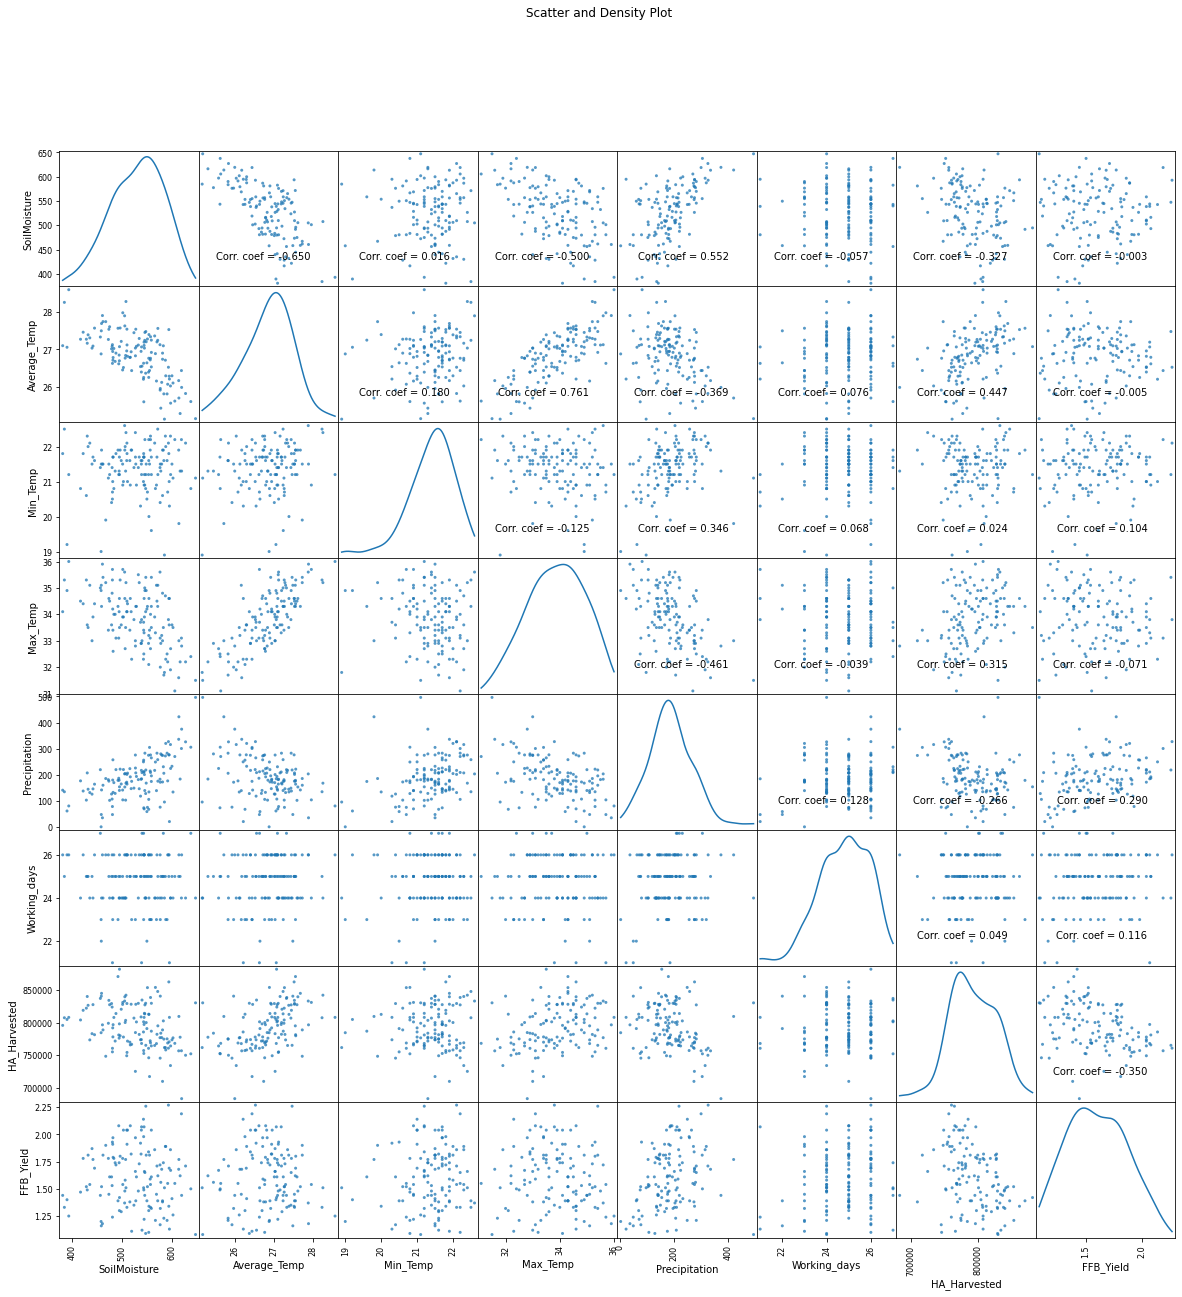

In [ ]:
plotScatterMatrix(data, 20, 10)

Interpreting The Heatmap
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. 

Two types of correlations are:

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

- From the above heatmap, it's seen that the features precipitation and soil moisture are highly correlated. 
- FFB Yield shows strong negative correlation with HA_Harvested and strong positive correlation with min_temp, working days and precipitation. 

## 8. Time for some feature selection magic
### There are three type of feature selection methods,
- filter methods, which we have tried above
- wrapper methods, which we will try below
- and embedded methods, which usually gets the best features. We shall try these as well here!

In [ ]:
data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [ ]:
X = data.drop(['FFB_Yield','Date'],axis=1)  #independent columns
y = data.FFB_Yield    #target column i.e FFB_Yield

In [ ]:
#Lets try the XGBRessor to fit the model and see what features contributes the most to get higher accuracies.

[14:58:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


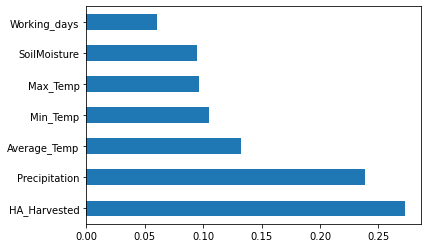

               Importance
HA_Harvested     0.272966
Precipitation    0.238876
Average_Temp     0.132031
Min_Temp         0.104916
Max_Temp         0.096757
SoilMoisture     0.094421
Working_days     0.060032


In [ ]:
xgb = XGBRegressor()
xgb.fit(X, y)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns)
imp = imp.sort_values(['Importance'], ascending = False)

feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

print(imp)

## Summary
- HA_Harvested, Precipitation, Min_Temp are still standing strong. Working_days is out and Average_Temp is in the team.

In [ ]:
#k_features=10 (It will get top 10 features best suited for prediction)
#forward=True (Forward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
model=sfs(RandomForestRegressor(),k_features=4,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    5.1s finished

[2021-08-05 14:42:16] Features: 1/4 -- score: -0.14063281749951978[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.4s finished

[2021-08-05 14:42:19] Features: 2/4 -- score: -0.1886947926060419[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished

[2021-08-05 14:42:22] Features: 3/4 -- score: 0.0912963426365051[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.3s finished

[2021-08-05 14:42:24] Features: 4/4 -- score: 0.228

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestRegressor(bootstrap=True,
                                                          ccp_alpha=0.0,
                                                          criterion='mse',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          max_samples=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
   

In [ ]:
#Get the selected feature index.
model.k_feature_idx_


(0, 4, 5, 6)

In [ ]:
#Get the column name for the selected feature.
model.k_feature_names_


('SoilMoisture', 'Precipitation', 'Working_days', 'HA_Harvested')

## Summary
- Findings: Soil Moisture and Working_days doing well together with Precipitaion and HA_Harvested.

In [ ]:
#k_features=4 (It will get top 10 features best suited for prediction)
#forward=False (Backward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
backwardModel=sfs(RandomForestRegressor(),k_features=4,forward=False,verbose=2,cv=5,n_jobs=-1,scoring='r2')
#We will convert our training data into numpy array. If we will not convert it, model is not able to read some of the column names. 
backwardModel.fit(np.array(X),y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    4.4s finished

[2021-08-05 14:42:30] Features: 6/4 -- score: 0.2392994344843923[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    3.6s finished

[2021-08-05 14:42:33] Features: 5/4 -- score: 0.2672227499897021[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished

[2021-08-05 14:42:36] Features: 4/4 -- score: 0.283683187230766

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestRegressor(bootstrap=True,
                                                          ccp_alpha=0.0,
                                                          criterion='mse',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          max_samples=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
   

In [ ]:
#Get the selected feature index.
backwardModel.k_feature_idx_

(0, 2, 4, 6)

In [ ]:
#Get the column name for the selected feature.
X.columns[list(backwardModel.k_feature_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Precipitation', 'HA_Harvested'], dtype='object')

## Summary
- Findings: Soil Moisture and Working_days doing well together with Precipitaion and HA_Harvested.

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
#min_features=1 (minimum number of feature)
#max_features=5 (maximum number of feature)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
emodel=efs(RandomForestRegressor(),min_features=1,max_features=7,scoring='r2',n_jobs=-1)
#Lets take only 10 features which we got from backward feature selection.
miniData=X[X.columns]

emodel.fit(np.array(miniData),y)
#If you see below the model creates 637 feature combinations from 10 features.Thats why its computationally very expensive.

Features: 127/127

ExhaustiveFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestRegressor(bootstrap=True,
                                                          ccp_alpha=0.0,
                                                          criterion='mse',
                                                          max_depth=None,
                                                          max_features='auto',
                                                          max_leaf_nodes=None,
                                                          max_samples=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
   

In [ ]:
#Get the selected feature index.
emodel.best_idx_

(0, 2, 4, 5, 6)

In [ ]:
#Get the column name for the selected feature.
miniData.columns[list(emodel.best_idx_)]

Index(['SoilMoisture', 'Min_Temp', 'Precipitation', 'Working_days',
       'HA_Harvested'],
      dtype='object')

## Summary
- Findings: Soil Moisture and Working_days are part of the best feature team together with Precipitaion, Min_Temp and HA_Harvested.